# ML Hackathon

In [1]:
# Supress warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

## Logistic Regresssion

In [3]:
# Importing the dataset.
lead= pd.read_csv('C:\\Users\\shrey\\Downloads\\train_wn75k28.csv')

In [4]:
# Head of our dataset.
lead.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [5]:
lead.shape

(39161, 19)

In [6]:
# Describing the dataset.
lead.describe(include='all')

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161,39161.000000,39161.000000,18250.000000,24048,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
unique,NaN,365,NaN,NaN,NaN,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2021-12-26,NaN,NaN,NaN,2021-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,181,NaN,NaN,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,19581.000000,NaN,6.523812,6.452746,2.154137,NaN,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,NaN,3.472944,2.614296,0.779815,NaN,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,NaN,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,NaN,4.000000,5.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,NaN,6.000000,6.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,NaN,9.000000,8.000000,3.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
# Checking the datatypes of the features.
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [8]:
# Converting the date columns to Datetime datatype.
lead.created_at=pd.to_datetime(lead.created_at)
lead.signup_date=pd.to_datetime(lead.signup_date)

In [9]:
# Finding the percentage of null values in the features.
round(100*(lead.isnull().sum()/lead.shape[0]), 2)

id                       0.00
created_at               0.00
campaign_var_1           0.00
campaign_var_2           0.00
products_purchased      53.40
signup_date             38.59
user_activity_var_1      0.00
user_activity_var_2      0.00
user_activity_var_3      0.00
user_activity_var_4      0.00
user_activity_var_5      0.00
user_activity_var_6      0.00
user_activity_var_7      0.00
user_activity_var_8      0.00
user_activity_var_9      0.00
user_activity_var_10     0.00
user_activity_var_11     0.00
user_activity_var_12     0.00
buy                      0.00
dtype: float64

In [10]:
# Removing the columns which has null values more than 50%
lead = lead.drop(['products_purchased'],axis=1)
lead.head()

,id,created_at,campaign_var_1,campaign_var_2,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [11]:
# Finding the percentage of null values in the dataset columns
round(100*(lead.isnull().sum()/lead.shape[0]), 2)

id                       0.00
created_at               0.00
campaign_var_1           0.00
campaign_var_2           0.00
signup_date             38.59
user_activity_var_1      0.00
user_activity_var_2      0.00
user_activity_var_3      0.00
user_activity_var_4      0.00
user_activity_var_5      0.00
user_activity_var_6      0.00
user_activity_var_7      0.00
user_activity_var_8      0.00
user_activity_var_9      0.00
user_activity_var_10     0.00
user_activity_var_11     0.00
user_activity_var_12     0.00
buy                      0.00
dtype: float64

In [12]:
# Replacing the null values with the mode.
lead.signup_date.replace(to_replace=np.NaN, value=lead.signup_date.mode().values[0], inplace=True)

In [13]:
# Finding the percentage of null values in the dataset columns
round(100*(lead.isnull().sum()/lead.shape[0]), 2)

id                      0.0
created_at              0.0
campaign_var_1          0.0
campaign_var_2          0.0
signup_date             0.0
user_activity_var_1     0.0
user_activity_var_2     0.0
user_activity_var_3     0.0
user_activity_var_4     0.0
user_activity_var_5     0.0
user_activity_var_6     0.0
user_activity_var_7     0.0
user_activity_var_8     0.0
user_activity_var_9     0.0
user_activity_var_10    0.0
user_activity_var_11    0.0
user_activity_var_12    0.0
buy                     0.0
dtype: float64

In [14]:
# Features extraction.
lead["Year"] = lead.created_at.dt.year
lead["month"] = lead.created_at.dt.month
lead["week"] = lead.created_at.dt.week
lead["day"] = lead.created_at.dt.day
lead["day_of_week"] = lead.created_at.dt.dayofweek

- Extracting features from the created_at column which can be useful in improving the models predictions.

In [15]:
lead.head()

,id,created_at,campaign_var_1,campaign_var_2,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,Year,month,week,day,day_of_week
0,1,2021-01-01,1,2,2020-09-24,0,0,0,0,0,...,0,0,0,0,0,2021,1,53,1,4
1,2,2021-01-01,2,1,2020-09-19,1,0,1,0,0,...,0,0,0,0,0,2021,1,53,1,4
2,3,2021-01-01,9,3,2021-08-11,1,0,0,0,0,...,0,0,0,0,0,2021,1,53,1,4
3,4,2021-01-01,6,7,2017-10-04,0,0,0,0,0,...,0,0,0,0,0,2021,1,53,1,4
4,5,2021-01-01,4,6,2020-06-08,0,0,0,0,0,...,0,0,1,0,0,2021,1,53,1,4


In [16]:
# COnverting the datime type columns to int to feed it to the model.
lead['signup_date']=lead['signup_date'].map(dt.datetime.toordinal)
lead['created_at']=lead['created_at'].map(dt.datetime.toordinal)

In [17]:
# Making a list of categorical features.
cat_features=['campaign_var_1', 'campaign_var_2', 'user_activity_var_1','user_activity_var_2','user_activity_var_3',
              'user_activity_var_4','user_activity_var_5','user_activity_var_6','user_activity_var_7',
             'user_activity_var_8','user_activity_var_9','user_activity_var_10','user_activity_var_11',
             'user_activity_var_12']

In [18]:
# Developing a function to visualize categorical variables.
def countplot(feature):
    for feature in cat_features:
        plt.figure(figsize=(12,6))
        sns.countplot(feature, data=lead, hue='buy', palette='magma')
        plt.xlabel(feature)
        plt.ylabel("Count")

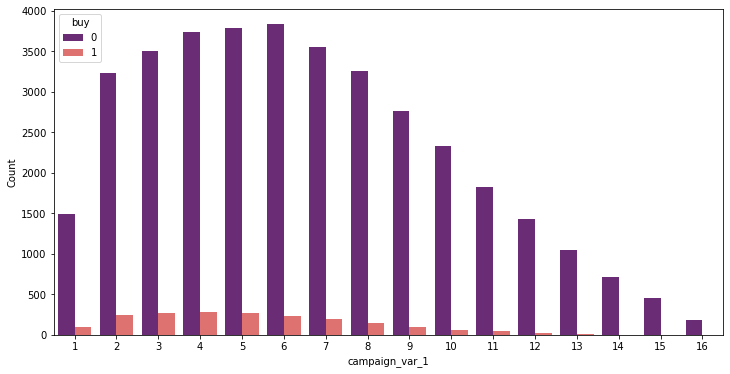

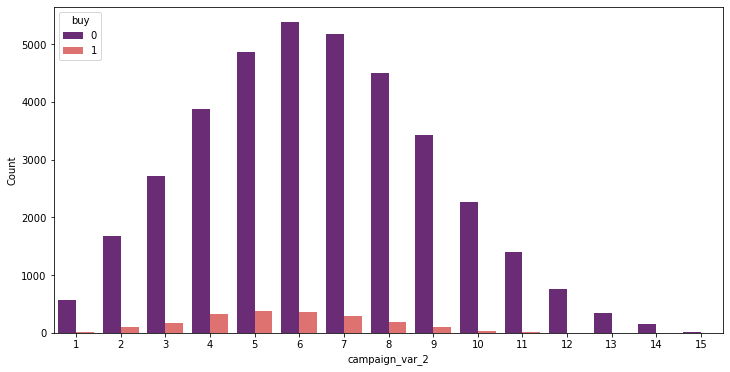

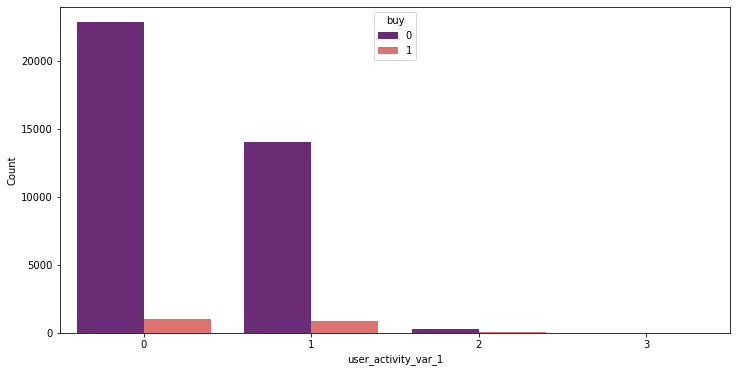

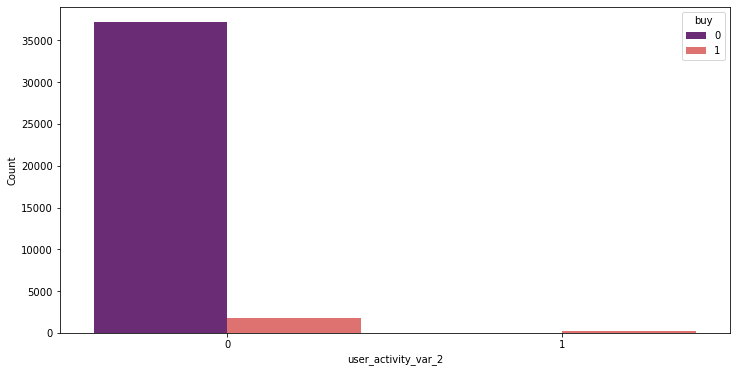

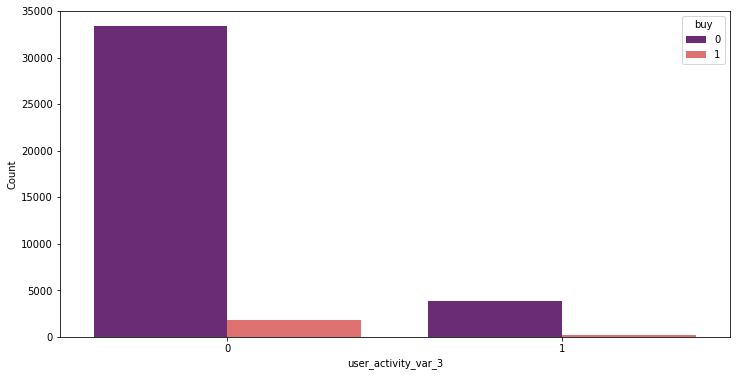

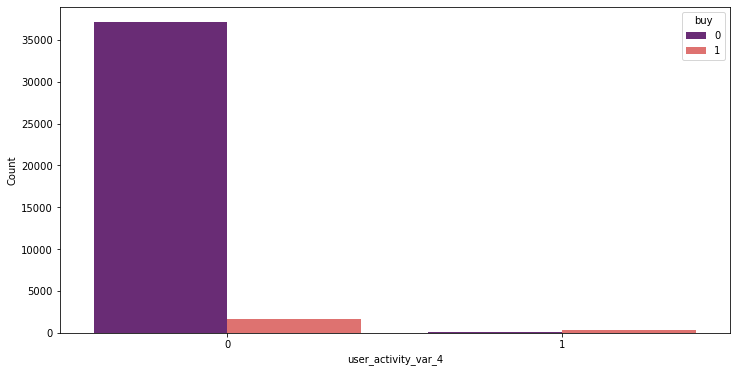

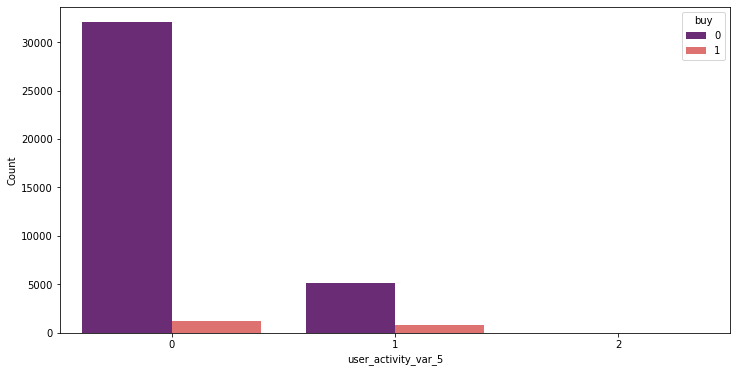

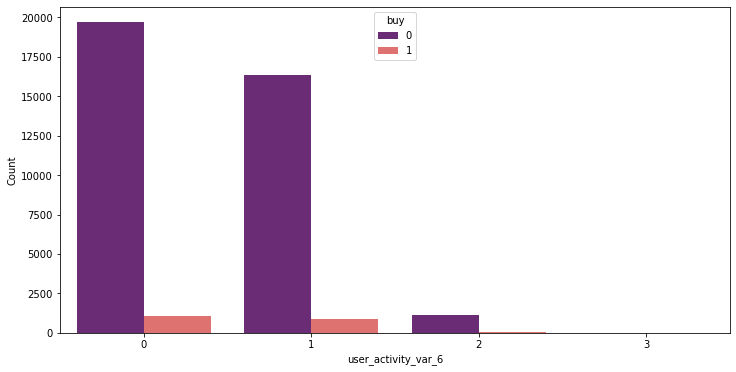

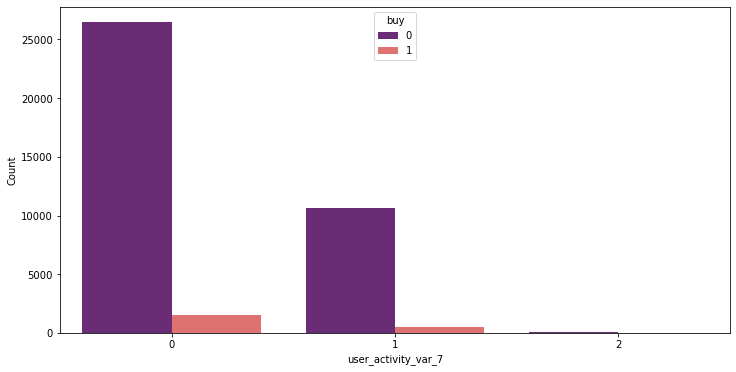

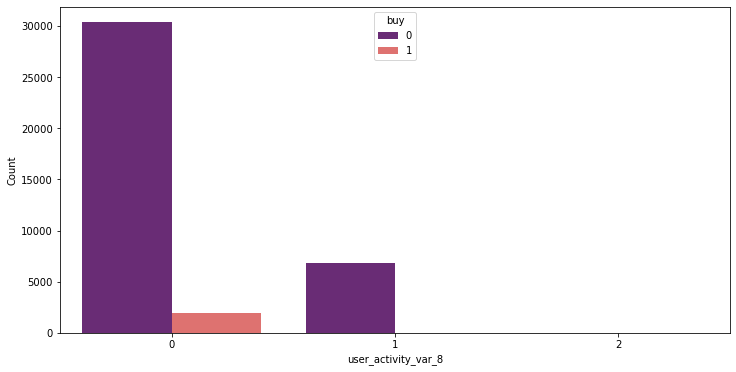

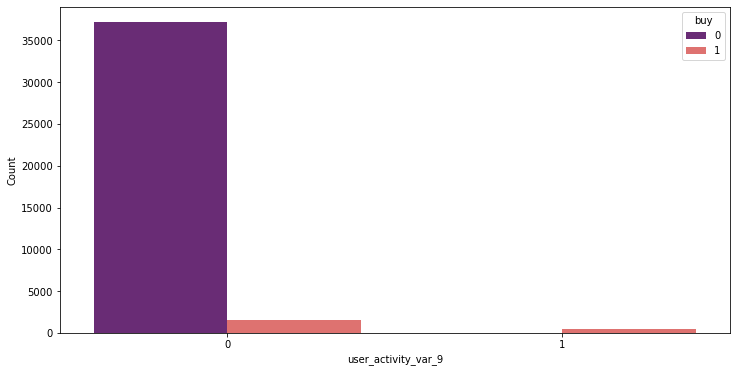

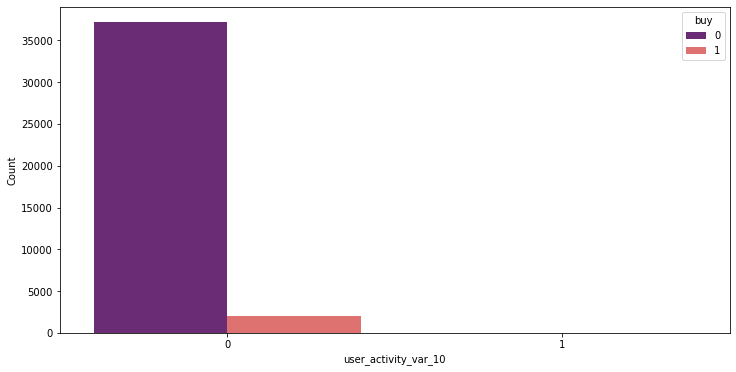

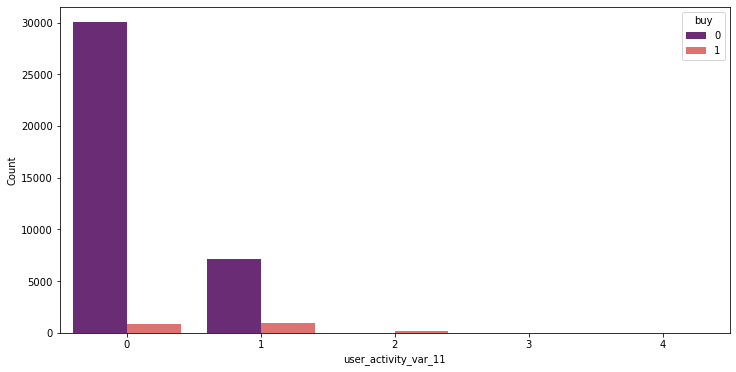

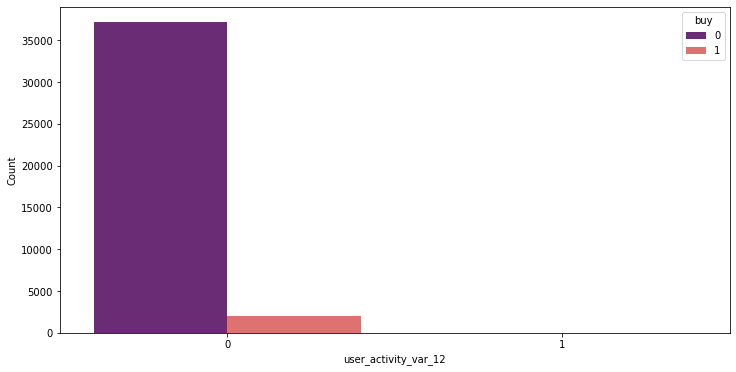

In [19]:
countplot(cat_features)

- We can see that the conversion rate of leads is very low across all the variables since the count of 0s are much more than the count of 1s.

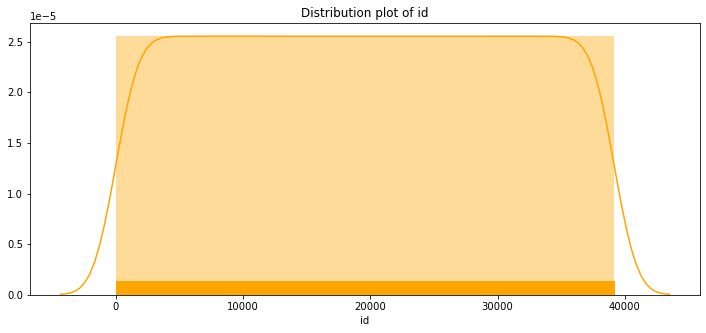

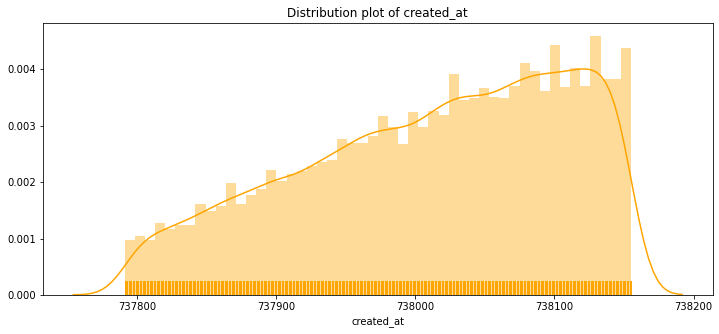

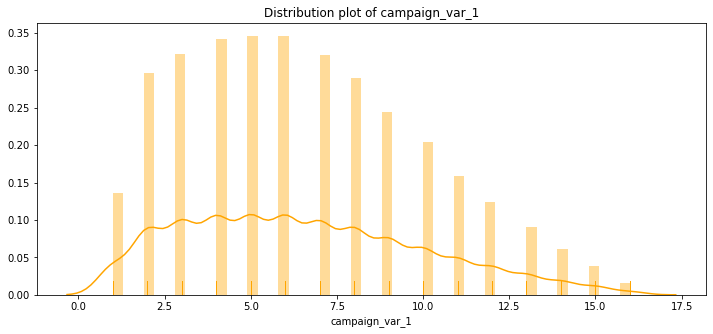

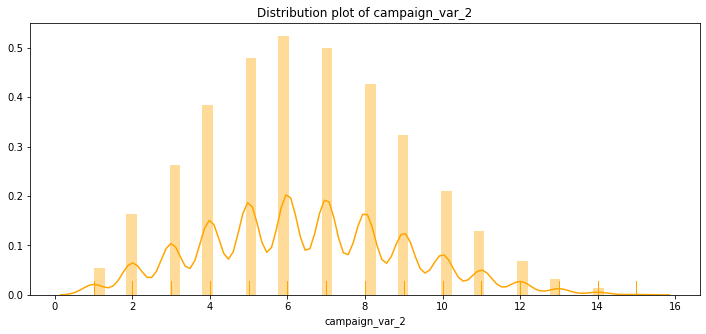

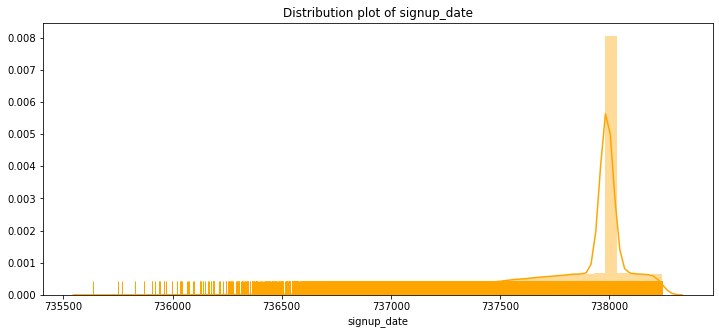

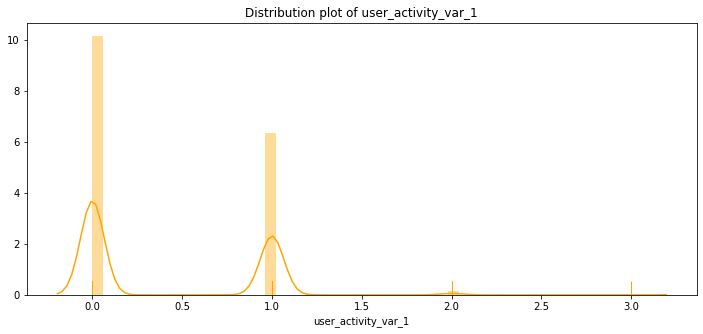

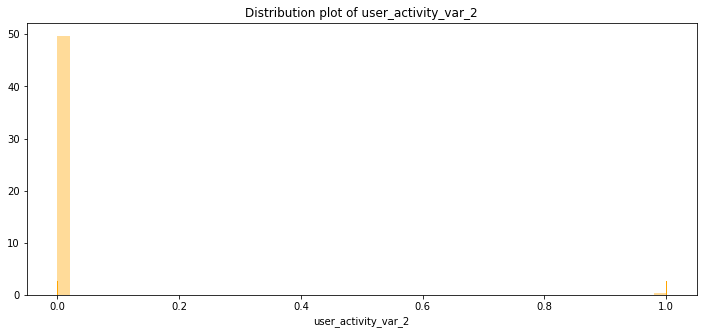

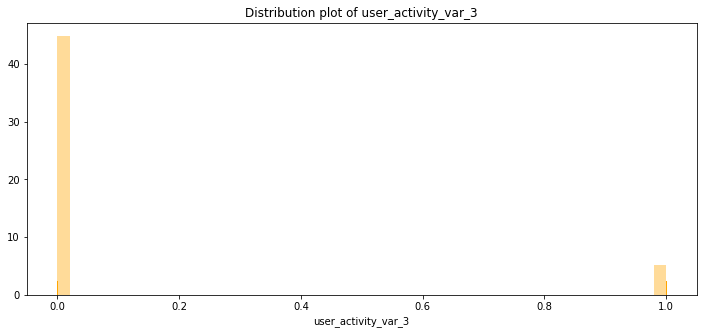

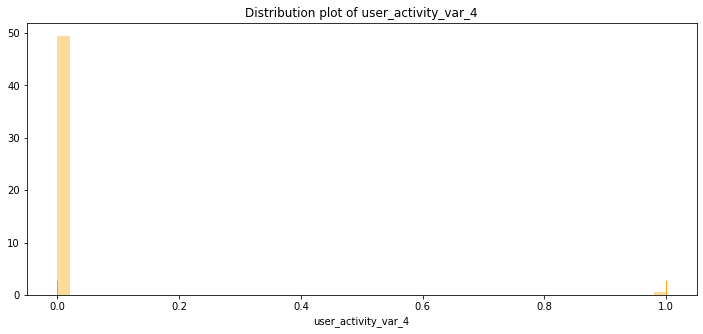

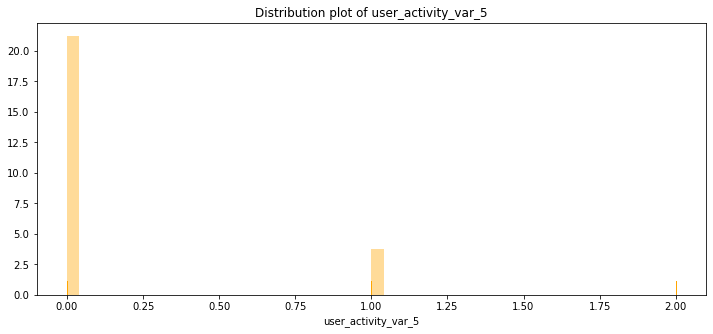

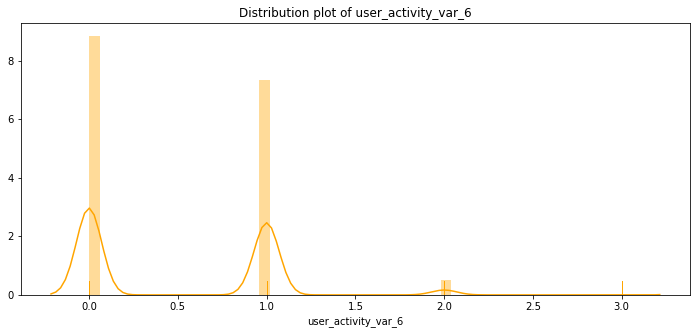

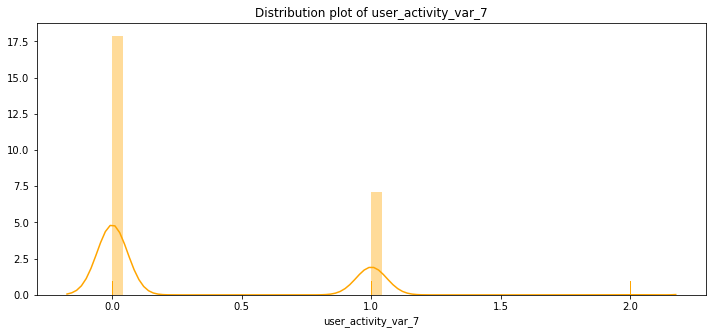

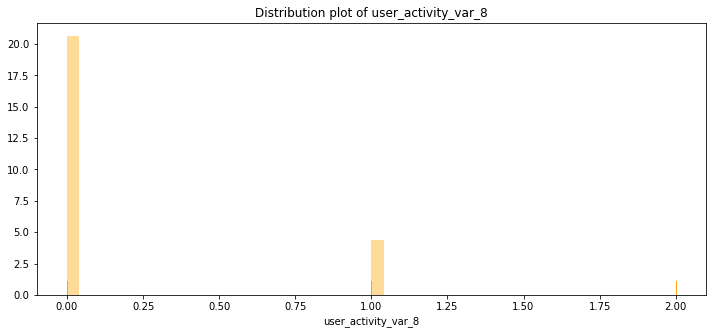

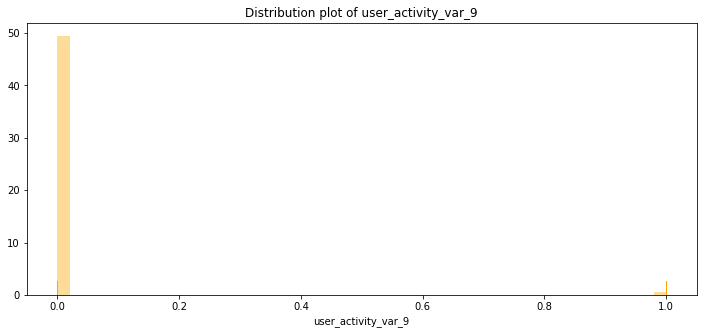

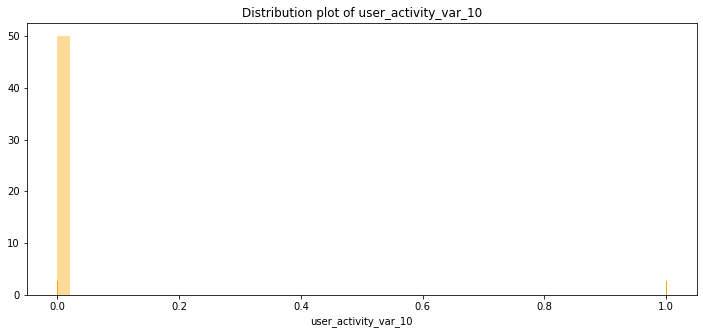

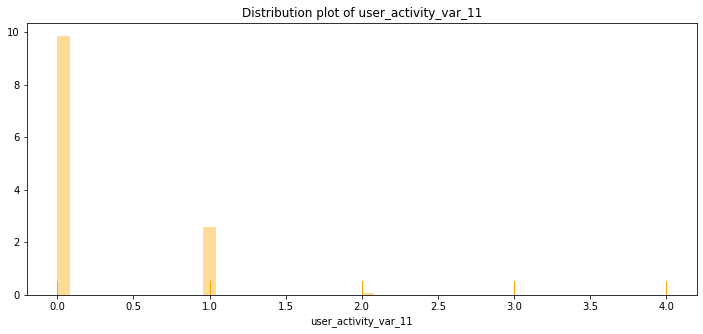

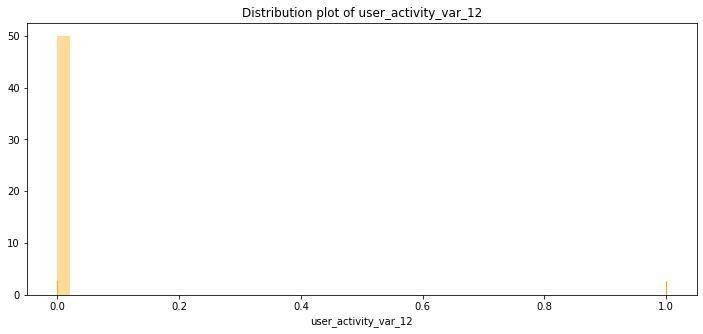

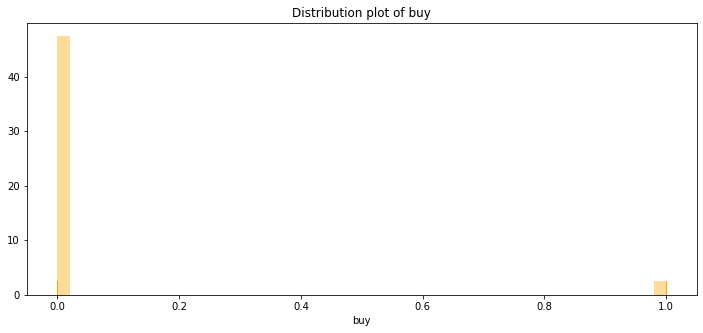

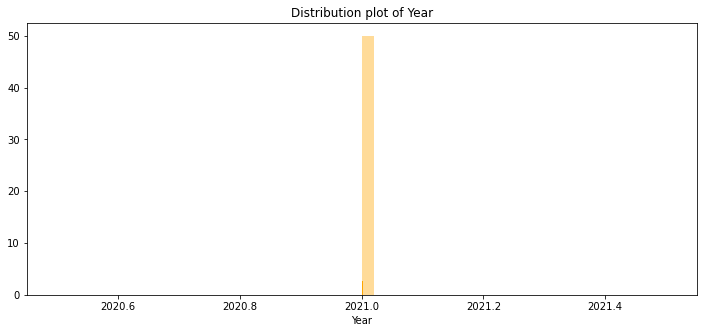

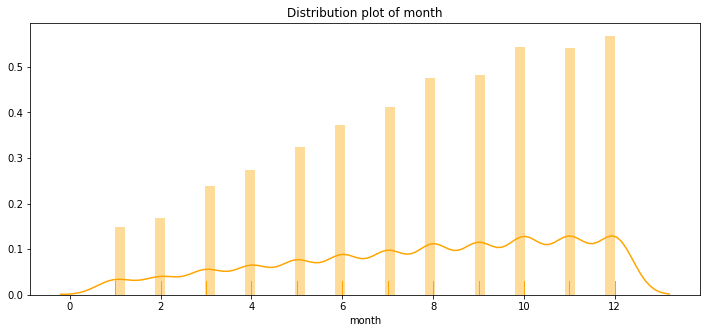

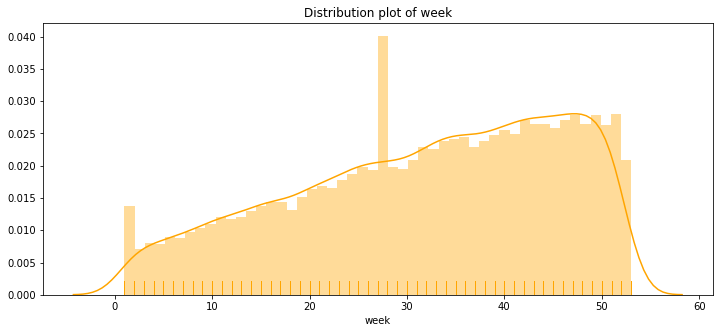

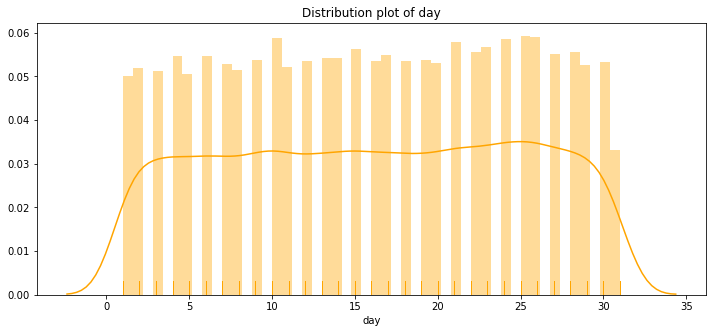

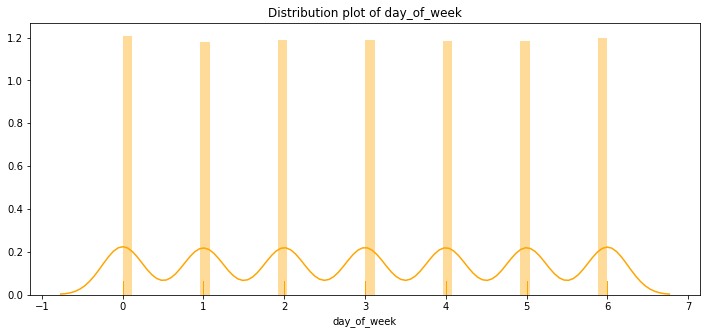

In [20]:
for x in lead.columns:
    plt.figure(figsize=(12,5))
    sns.distplot(lead[x], kde = True, rug= True, hist = True, bins=50, color='orange')
    plt.title("Distribution plot of "+ x)

- We can see that none of the features are normally distributed and are skewed hence logstic regression might not work well.

In [21]:
# Plotting a boxplot to check for outliers in the numerical column.
def box(feature):
    for feature in cat_features:
        plt.figure(figsize=(12,6))
        sns.boxplot(y = feature, x = "buy", orient="v", data = lead)
        plt.show()

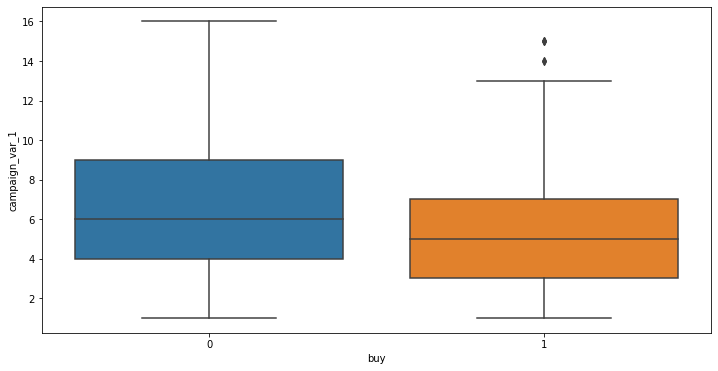

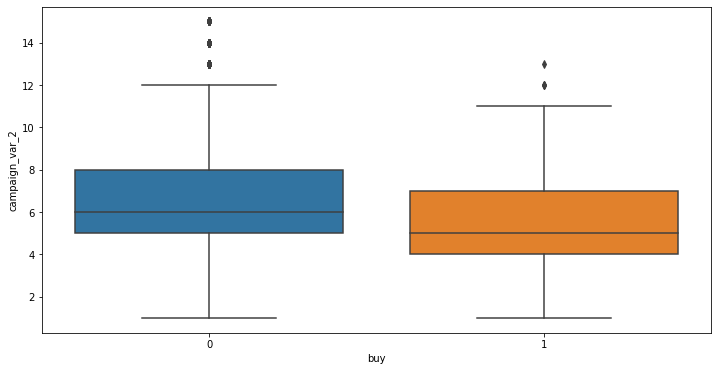

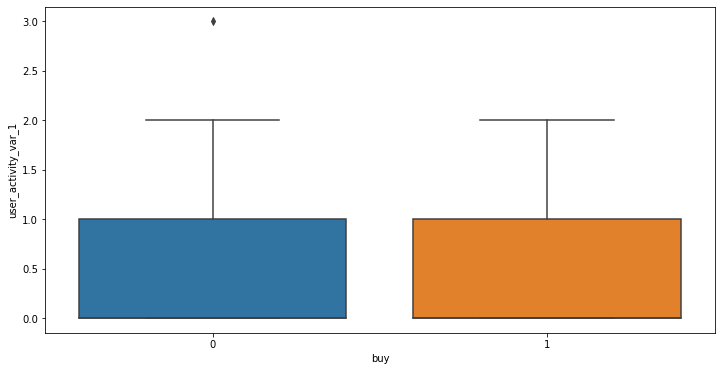

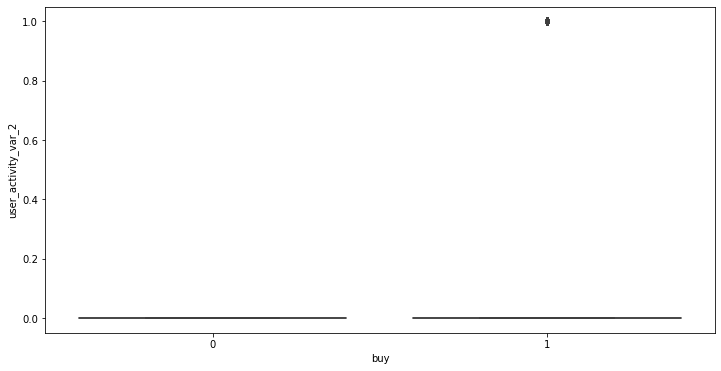

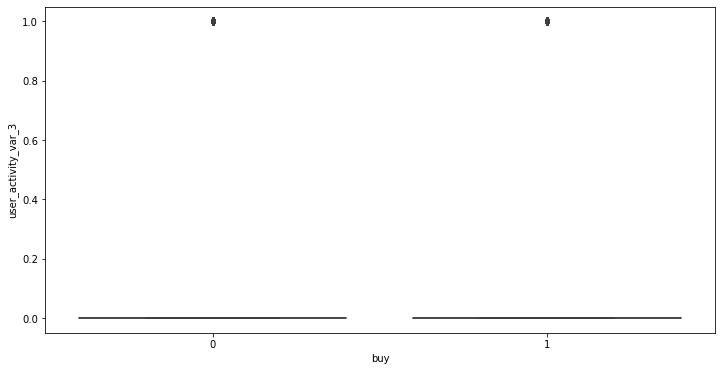

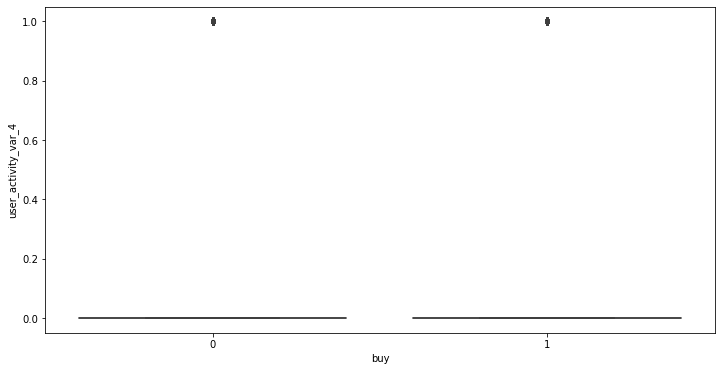

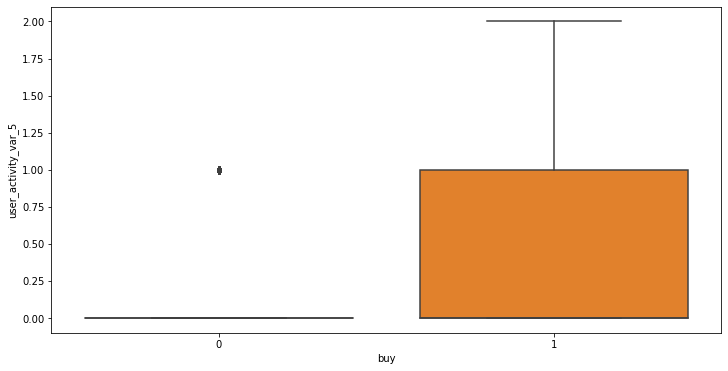

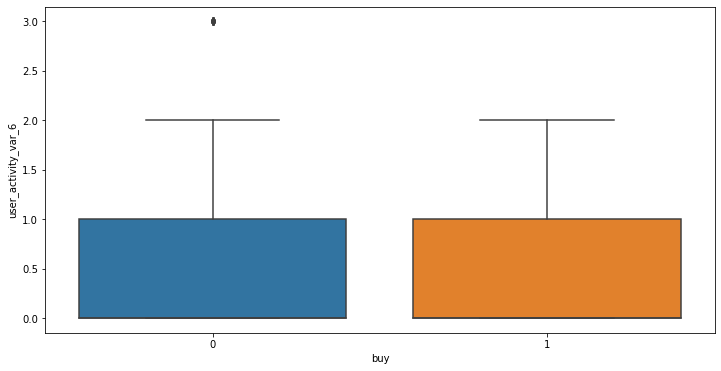

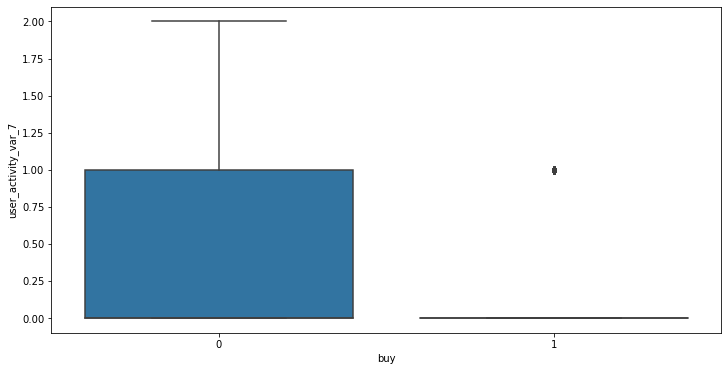

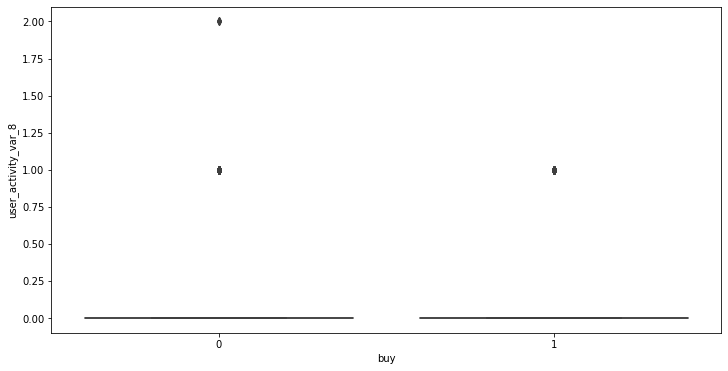

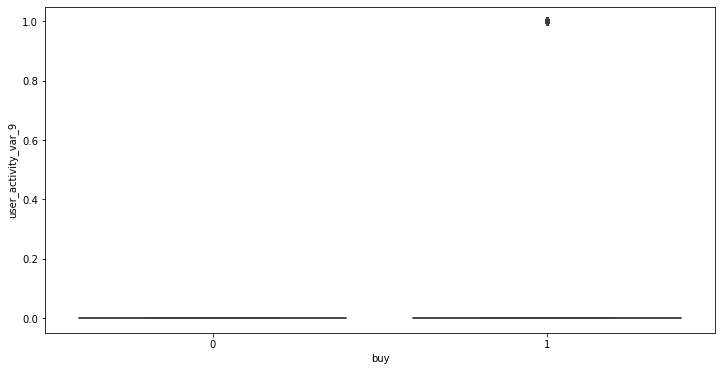

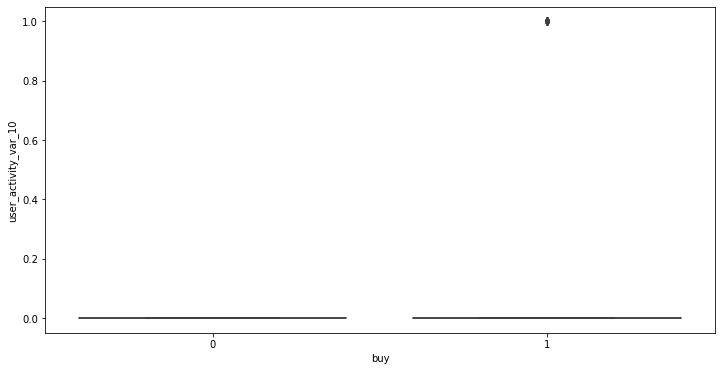

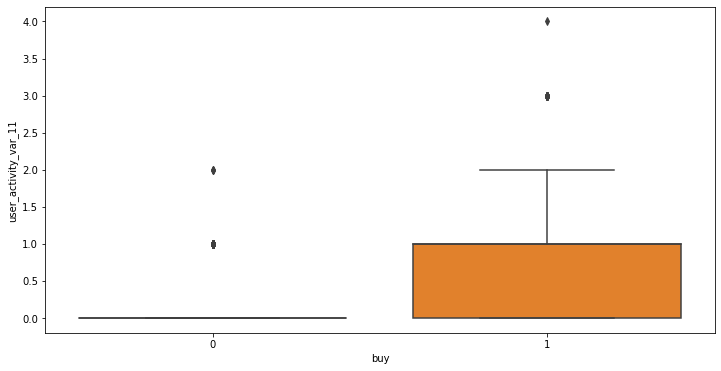

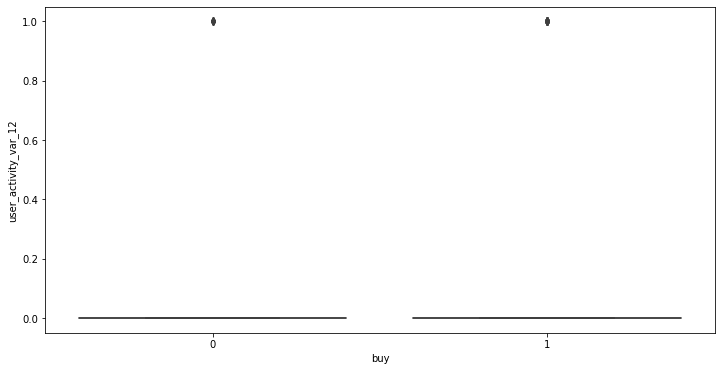

In [22]:
box(cat_features)

- We can see that 'user_activity_var_1', 'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7','user_activity_var_8' and  'user_activity_var_11' have outliers.

In [23]:
# Features having outliers.
out_features= ['user_activity_var_1', 'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
               'user_activity_var_8', 'user_activity_var_11']

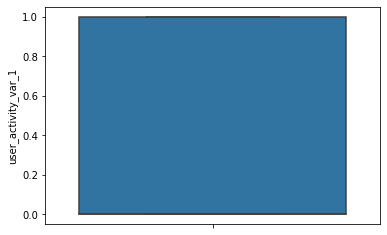

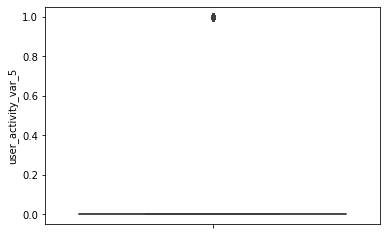

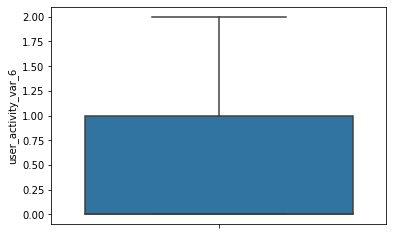

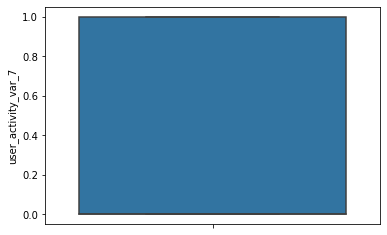

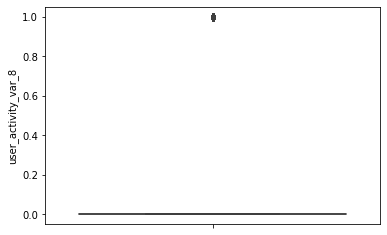

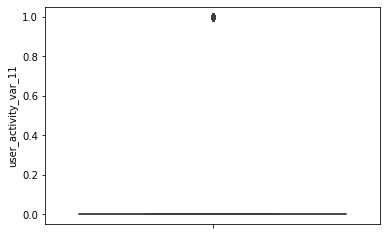

In [24]:
# Removing the outliers above 99th percentile and below 1 percentile.
for feature in out_features:
    Q1 = lead[feature].quantile(0.01)
    Q3 = lead[feature].quantile(0.99)
    lead = lead[lead[feature] <= Q3]
    lead = lead[lead[feature] >= Q1]
    sns.boxplot(y=lead[feature])
    plt.show()

In [25]:
# Creating X_train and y_train.
X_train=lead.drop(['id','buy'], axis=1)
y_train = lead['buy']

In [26]:
# Getting all the numerical columns.
num_cols = lead._get_numeric_data().columns

In [27]:
num_cols

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2', 'signup_date',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'buy', 'Year', 'month', 'week', 'day', 'day_of_week'],
      dtype='object')

In [28]:
# Scaling of numerical columns.
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,created_at,campaign_var_1,campaign_var_2,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,Year,month,week,day,day_of_week
0,-2.297235,-1.592301,-1.705009,-0.365130,-0.791632,-0.077239,-0.339203,-0.103952,-0.41898,-0.903827,...,2.163813,-0.099649,-0.019757,-0.511841,-0.022814,0.0,-2.158973,1.553422,-1.710007,0.500085
1,-2.297235,-1.304613,-2.087028,-0.380144,1.263213,-0.077239,2.948085,-0.103952,-0.41898,-0.903827,...,-0.462147,-0.099649,-0.019757,-0.511841,-0.022814,0.0,-2.158973,1.553422,-1.710007,0.500085
2,-2.297235,0.709204,-1.322991,0.598717,1.263213,-0.077239,-0.339203,-0.103952,-0.41898,-0.903827,...,-0.462147,-0.099649,-0.019757,-0.511841,-0.022814,0.0,-2.158973,1.553422,-1.710007,0.500085
3,-2.297235,-0.153860,0.205085,-3.625997,-0.791632,-0.077239,-0.339203,-0.103952,-0.41898,-0.903827,...,-0.462147,-0.099649,-0.019757,-0.511841,-0.022814,0.0,-2.158973,1.553422,-1.710007,0.500085
4,-2.297235,-0.729237,-0.176934,-0.689415,-0.791632,-0.077239,-0.339203,-0.103952,-0.41898,-0.903827,...,-0.462147,-0.099649,-0.019757,1.953731,-0.022814,0.0,-2.158973,1.553422,-1.710007,0.500085


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38445 entries, 0 to 39160
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            38445 non-null  float64
 1   campaign_var_1        38445 non-null  float64
 2   campaign_var_2        38445 non-null  float64
 3   signup_date           38445 non-null  float64
 4   user_activity_var_1   38445 non-null  float64
 5   user_activity_var_2   38445 non-null  float64
 6   user_activity_var_3   38445 non-null  float64
 7   user_activity_var_4   38445 non-null  float64
 8   user_activity_var_5   38445 non-null  float64
 9   user_activity_var_6   38445 non-null  float64
 10  user_activity_var_7   38445 non-null  float64
 11  user_activity_var_8   38445 non-null  float64
 12  user_activity_var_9   38445 non-null  float64
 13  user_activity_var_10  38445 non-null  float64
 14  user_activity_var_11  38445 non-null  float64
 15  user_activity_var_1

In [30]:
# Building our first Logistic regression model.
model1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    buy   No. Observations:                38445
Model:                            GLM   Df Residuals:                    38424
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 05 Jun 2022   Deviance:                          nan
Time:                        17:42:29   Pearson chi2:                 3.71e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.0557   4.39e+04  -9.25e-05      1.000    -8.6e+04    8.59e+04
created_at              12.5166   1.74e+06   7.17e-06      1.000   -3.42e+06    3.42e+06
campaign_var_1          -0.3183      0.046     -6.933      0.000      -0.408      -0.228
campaign_var_2          -0.1258      0.045     -2.820      0.005      -0.213      -0.038
signup_date             -0.4941      0.027    -18.343      0.000      -0.547      -0.441
user_activity_var_1      0.2454      0.035      6.944      0.000       0.176       0.315
user_activity_var_2      3.2329   3.46e+05   9.35e-06      1.000   -6.77e+05    6.77e+05
user_activity_var_3      0.0051      0.035      0.146      0.884      -0.063       0.073
user_activity_var_4      0.5197      0.018     28.734      0.000       0.484       0.555
user_activity_var_5      0.5093      0.026     19.425      0.000       0.458       0.561
user_activity_var_6      0.1798      0.036      4.949      0.000       0.109       0.251
user_activity_var_7     -0.0676      0.038     -1.800      0.072      -0.141       0.006
user_activity_var_8     -1.0988      0.119     -9.261      0.000      -1.331      -0.866
user_activity_var_9      4.2108   3.44e+05   1.22e-05      1.000   -6.74e+05    6.74e+05
user_activity_var_10     0.7979   3.43e+05   2.33e-06      1.000   -6.72e+05    6.72e+05
user_activity_var_11     0.7222      0.029     24.723      0.000       0.665       0.779
user_activity_var_12     0.0928      0.017      5.436      0.000       0.059       0.126
Year                  1.637e-13   1.22e-08   1.35e-05      1.000   -2.38e-08    2.38e-08
month                   -2.5733      5.726     -0.449      0.653     -13.796       8.650
week                    -9.8604   1.74e+06  -5.67e-06      1.000   -3.41e+06    3.41e+06
day                     -0.2562      0.526     -0.487      0.626      -1.288       0.775
day_of_week             -0.1481   3.64e+04  -4.07e-06      1.000   -7.14e+04    7.14e+04
========================================================================================
"""

In [31]:
LogR = LogisticRegression()
# Running RFE with 10 variables as output.
rfe = RFE(LogR, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [32]:
# Creating a list of columns with rfe support and ranking.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('created_at', True, 1),
 ('campaign_var_1', True, 1),
 ('campaign_var_2', False, 6),
 ('signup_date', True, 1),
 ('user_activity_var_1', False, 3),
 ('user_activity_var_2', True, 1),
 ('user_activity_var_3', False, 11),
 ('user_activity_var_4', True, 1),
 ('user_activity_var_5', True, 1),
 ('user_activity_var_6', False, 5),
 ('user_activity_var_7', False, 8),
 ('user_activity_var_8', True, 1),
 ('user_activity_var_9', True, 1),
 ('user_activity_var_10', False, 4),
 ('user_activity_var_11', True, 1),
 ('user_activity_var_12', False, 7),
 ('Year', False, 12),
 ('month', False, 2),
 ('week', True, 1),
 ('day', False, 10),
 ('day_of_week', False, 9)]

In [33]:
# Columns with rfe support only.
X_train.columns[~rfe.support_]

Index(['campaign_var_2', 'user_activity_var_1', 'user_activity_var_3',
       'user_activity_var_6', 'user_activity_var_7', 'user_activity_var_10',
       'user_activity_var_12', 'Year', 'month', 'day', 'day_of_week'],
      dtype='object')

In [34]:
# Creating X_train dataframe 'X_train_rfe' with RFE selected features.
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,created_at,campaign_var_1,signup_date,user_activity_var_2,user_activity_var_4,user_activity_var_5,user_activity_var_8,user_activity_var_9,user_activity_var_11,week
0,-2.297235,-1.592301,-0.365130,-0.077239,-0.103952,-0.41898,2.163813,-0.099649,-0.511841,1.553422
1,-2.297235,-1.304613,-0.380144,-0.077239,-0.103952,-0.41898,-0.462147,-0.099649,-0.511841,1.553422
2,-2.297235,0.709204,0.598717,-0.077239,-0.103952,-0.41898,-0.462147,-0.099649,-0.511841,1.553422
3,-2.297235,-0.153860,-3.625997,-0.077239,-0.103952,-0.41898,-0.462147,-0.099649,-0.511841,1.553422
4,-2.297235,-0.729237,-0.689415,-0.077239,-0.103952,-0.41898,-0.462147,-0.099649,1.953731,1.553422


In [35]:
# Building our second Logistic regression model.
X_train_sm = sm.add_constant(X_train_rfe)
model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    buy   No. Observations:                38445
Model:                            GLM   Df Residuals:                    38434
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 05 Jun 2022   Deviance:                          nan
Time:                        17:42:32   Pearson chi2:                 3.66e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.9455   4.01e+04  -9.85e-05      1.000   -7.85e+04    7.85e+04
created_at               2.3760      1.628      1.459      0.145      -0.816       5.568
campaign_var_1          -0.3771      0.038     -9.817      0.000      -0.452      -0.302
signup_date             -0.4985      0.027    -18.752      0.000      -0.551      -0.446
user_activity_var_2      3.2322   3.45e+05   9.36e-06      1.000   -6.77e+05    6.77e+05
user_activity_var_4      0.5123      0.018     28.993      0.000       0.478       0.547
user_activity_var_5      0.4952      0.026     19.270      0.000       0.445       0.546
user_activity_var_8     -1.1080      0.117     -9.447      0.000      -1.338      -0.878
user_activity_var_9      4.1911   3.44e+05   1.22e-05      1.000   -6.74e+05    6.74e+05
user_activity_var_11     0.6903      0.028     24.378      0.000       0.635       0.746
week                    -2.3370      1.622     -1.441      0.150      -5.516       0.842
========================================================================================
"""

In [36]:
# Dropping user_activity_var_9 due to high p value.
X_train_rfe.drop('user_activity_var_9', axis=1, inplace=True)

In [37]:
# Building our third Logistic regression model.
X_train_sm = sm.add_constant(X_train_rfe)
model3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    buy   No. Observations:                38445
Model:                            GLM   Df Residuals:                    38435
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4247.2
Date:                Sun, 05 Jun 2022   Deviance:                       8494.4
Time:                        17:42:32   Pearson chi2:                 3.70e+04
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.1958    108.931     -0.039      0.969    -217.696     209.305
created_at               1.6445      1.207      1.363      0.173      -0.721       4.010
campaign_var_1          -0.4372      0.035    -12.446      0.000      -0.506      -0.368
signup_date             -0.5187      0.024    -21.750      0.000      -0.565      -0.472
user_activity_var_2      2.2443   1410.300      0.002      0.999   -2761.893    2766.381
user_activity_var_4      0.5208      0.017     31.002      0.000       0.488       0.554
user_activity_var_5      0.4874      0.023     20.942      0.000       0.442       0.533
user_activity_var_8     -1.0614      0.098    -10.815      0.000      -1.254      -0.869
user_activity_var_11     0.6913      0.025     27.134      0.000       0.641       0.741
week                    -1.6199      1.202     -1.347      0.178      -3.976       0.736
========================================================================================
"""

In [38]:
# Creating a dataframe of the variables with their respective VIF value.
vif = pd.DataFrame()
vif["variables"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,variables,VIF
0,created_at,26.35
8,week,26.25
2,signup_date,1.04
3,user_activity_var_2,1.03
4,user_activity_var_4,1.03
1,campaign_var_1,1.02
5,user_activity_var_5,1.01
6,user_activity_var_8,1.01
7,user_activity_var_11,1.01


In [39]:
# Dropping user_activity_var_2 due to high p value.
X_train_rfe.drop('user_activity_var_2', axis=1, inplace=True)

In [40]:
# Building our third Logistic regression model.
X_train_sm = sm.add_constant(X_train_rfe)
model3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    buy   No. Observations:                38445
Model:                            GLM   Df Residuals:                    38436
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4736.3
Date:                Sun, 05 Jun 2022   Deviance:                       9472.6
Time:                        17:42:33   Pearson chi2:                 3.67e+04
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.2122      0.058    -73.136      0.000      -4.325      -4.099
created_at               1.4920      1.002      1.490      0.136      -0.471       3.455
campaign_var_1          -0.4463      0.033    -13.515      0.000      -0.511      -0.382
signup_date             -0.5148      0.023    -22.875      0.000      -0.559      -0.471
user_activity_var_4      0.5176      0.016     31.496      0.000       0.485       0.550
user_activity_var_5      0.4880      0.022     22.313      0.000       0.445       0.531
user_activity_var_8     -1.0494      0.091    -11.595      0.000      -1.227      -0.872
user_activity_var_11     0.6892      0.024     28.860      0.000       0.642       0.736
week                    -1.4708      0.998     -1.474      0.140      -3.426       0.485
========================================================================================
"""

In [41]:
# Creating a dataframe of the variables with their respective VIF value.
vif = pd.DataFrame()
vif["variables"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,variables,VIF
0,created_at,26.35
7,week,26.25
2,signup_date,1.04
1,campaign_var_1,1.02
3,user_activity_var_4,1.01
4,user_activity_var_5,1.01
5,user_activity_var_8,1.01
6,user_activity_var_11,1.00


In [42]:
# Dropping created_at due to high p value.
X_train_rfe.drop('created_at', axis=1, inplace=True)

In [43]:
# Building our third Logistic regression model.
X_train_sm = sm.add_constant(X_train_rfe)
model4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    buy   No. Observations:                38445
Model:                            GLM   Df Residuals:                    38437
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4744.7
Date:                Sun, 05 Jun 2022   Deviance:                       9489.5
Time:                        17:42:33   Pearson chi2:                 3.67e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.1973      0.057    -74.256      0.000      -4.308      -4.086
campaign_var_1          -0.4413      0.033    -13.385      0.000      -0.506      -0.377
signup_date             -0.5082      0.022    -22.679      0.000      -0.552      -0.464
user_activity_var_4      0.5175      0.016     31.516      0.000       0.485       0.550
user_activity_var_5      0.4871      0.022     22.290      0.000       0.444       0.530
user_activity_var_8     -1.0489      0.090    -11.593      0.000      -1.226      -0.872
user_activity_var_11     0.6885      0.024     28.851      0.000       0.642       0.735
week                     0.0036      0.029      0.124      0.901      -0.054       0.061
========================================================================================
"""

In [44]:
# Dropping week due to high p value.
X_train_rfe.drop('week', axis=1, inplace=True)

In [45]:
# Building our third Logistic regression model.
X_train_sm = sm.add_constant(X_train_rfe)
model5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    buy   No. Observations:                38445
Model:                            GLM   Df Residuals:                    38438
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4744.7
Date:                Sun, 05 Jun 2022   Deviance:                       9489.5
Time:                        17:42:33   Pearson chi2:                 3.67e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.1973      0.057    -74.257      0.000      -4.308      -4.087
campaign_var_1          -0.4408      0.033    -13.476      0.000      -0.505      -0.377
signup_date             -0.5076      0.022    -23.125      0.000      -0.551      -0.465
user_activity_var_4      0.5175      0.016     31.516      0.000       0.485       0.550
user_activity_var_5      0.4871      0.022     22.293      0.000       0.444       0.530
user_activity_var_8     -1.0491      0.090    -11.597      0.000      -1.226      -0.872
user_activity_var_11     0.6886      0.024     28.876      0.000       0.642       0.735
========================================================================================
"""

In [46]:
# Creating a dataframe of the variables with their respective VIF value.
vif = pd.DataFrame()
vif["variables"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,variables,VIF
1,signup_date,1.01
2,user_activity_var_4,1.01
3,user_activity_var_5,1.01
4,user_activity_var_8,1.01
0,campaign_var_1,1.00
5,user_activity_var_11,1.00


In [47]:
train_pred=result.predict(X_train_sm)
train_pred[:10]

0    0.002045
1    0.027792
2    0.007109
3    0.082078
4    0.124154
5    0.047274
6    0.035898
7    0.067920
8    0.088533
9    0.069954
dtype: float64

In [48]:
# Creating a Dataframe with actual and predicted values.
pred_actual=pd.DataFrame({'id': lead.id, 'actual':y_train.values, 'probability':train_pred.values})
pred_actual.head()

,id,actual,probability
0,1,0,0.002045
1,2,0,0.027792
2,3,0,0.007109
3,4,0,0.082078
4,5,0,0.124154


In [49]:
# Defining a function to plot the ROC curve.
def roc_curve(actual, prob):
    fpr, tpr, threshold = metrics.roc_curve(actual, prob, drop_intermediate= False)
    area_under_curve = metrics.roc_auc_score(actual, prob)
    
    plt.figure(figsize=(8,5))
    plt.plot(fpr, tpr, label = 'ROC CURVE (Area = %0.2f)' %area_under_curve)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate [1 - Specificity]')
    plt.ylabel('True Positive Rate [Sensitivity]')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

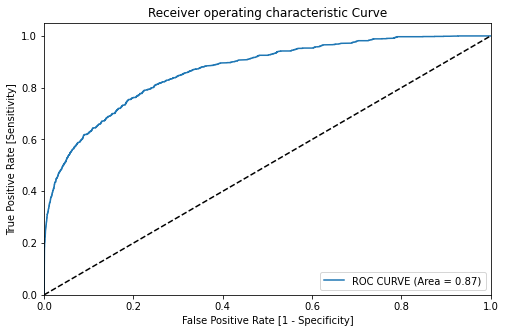

In [50]:
# Visualizing the ROC curve
roc_curve(pred_actual.actual, pred_actual.probability)

In [51]:
num = [float(x)/10 for x in range(10)]
for i in num:
    pred_actual[i] = pred_actual.probability.map(lambda x: 1 if x > i else 0)
pred_actual.head()

,id,actual,probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0.002045,1,0,0,0,0,0,0,0,0,0
1,2,0,0.027792,1,0,0,0,0,0,0,0,0,0
2,3,0,0.007109,1,0,0,0,0,0,0,0,0,0
3,4,0,0.082078,1,0,0,0,0,0,0,0,0,0
4,5,0,0.124154,1,1,0,0,0,0,0,0,0,0


In [52]:
# Finding all the metrics.
lead_metrics = pd.DataFrame(columns=["probability", "accuracy", "sensitivity", "specificity"])
num = [float(x)/10 for x in range(10)]
for i in num:
    conf_m = metrics.confusion_matrix(pred_actual.actual, pred_actual[i])

    total = conf_m[0,0] + conf_m[0,1] +conf_m[1,0] +conf_m[1,1]
    accuracy = (conf_m[0,0] + conf_m[1,1])/ total
    
    sensitivity = conf_m[1,1]/(conf_m[1,1]+conf_m[1,0])
    specificity = conf_m[0,0]/(conf_m[0,0] +conf_m[0,1])
    
    lead_metrics.loc[i] = [i, accuracy, sensitivity, specificity]

lead_metrics

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.043881,1.000000,0.000000
0.1,0.1,0.917597,0.565501,0.933756
0.2,0.2,0.953492,0.412567,0.978318
0.3,0.3,0.962180,0.320688,0.991621
0.4,0.4,0.963870,0.267931,0.995810
0.5,0.5,0.964079,0.237107,0.997443
0.6,0.6,0.963922,0.212211,0.998422
0.7,0.7,0.963714,0.192057,0.999129
0.8,0.8,0.963116,0.168939,0.999565
0.9,0.9,0.961269,0.123296,0.999728


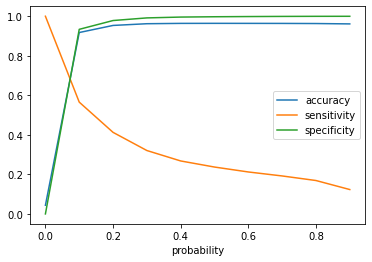

In [53]:
# Plotting accuracy, sensitivity and specificity for various probabilities. 
lead_metrics.plot.line(x = "probability", y = ["accuracy","sensitivity","specificity"])
plt.show()

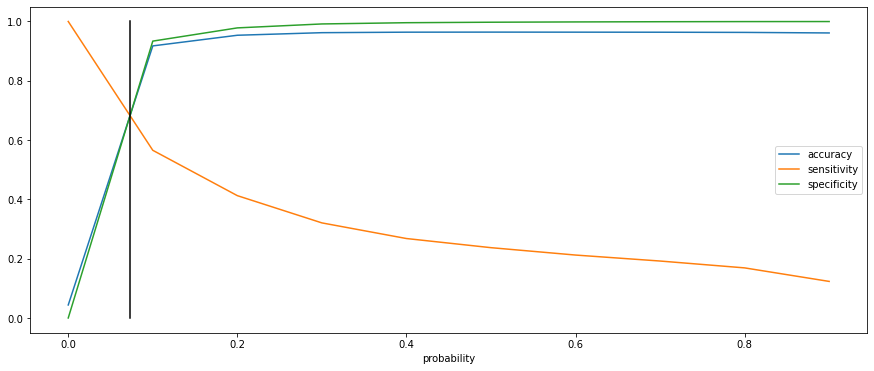

In [54]:
lead_metrics.plot.line(x = "probability", y = ["accuracy","sensitivity","specificity"], figsize=(15,6))
plt.plot([0.073,0.073],[0, 1], 'black')
plt.show()

In [55]:
pred_actual['final_prediction']=pred_actual['probability'].map(lambda x : 1 if x>0.073 else 0)

In [56]:
pred_actual.head()

,id,actual,probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,1,0,0.002045,1,0,0,0,0,0,0,0,0,0,0
1,2,0,0.027792,1,0,0,0,0,0,0,0,0,0,0
2,3,0,0.007109,1,0,0,0,0,0,0,0,0,0,0
3,4,0,0.082078,1,0,0,0,0,0,0,0,0,0,1
4,5,0,0.124154,1,1,0,0,0,0,0,0,0,0,1


In [57]:
conf_m=metrics.confusion_matrix(pred_actual.actual, pred_actual.final_prediction)
conf_m

array([[32841,  3917],
       [  613,  1074]], dtype=int64)

In [58]:
TP = conf_m[1,1]
TN = conf_m[0,0]
FP = conf_m[0,1]
FN = conf_m[1,0]

In [59]:
#Calculating parameters for evaluating the logistc model
Sensitivity = TP/float(TP + FN)
print("Sensitivity:", Sensitivity)
Specificity = TN/float(TN + FP)
print("Specificity:", Specificity)

Sensitivity: 0.6366330764671013
Specificity: 0.8934381631209533


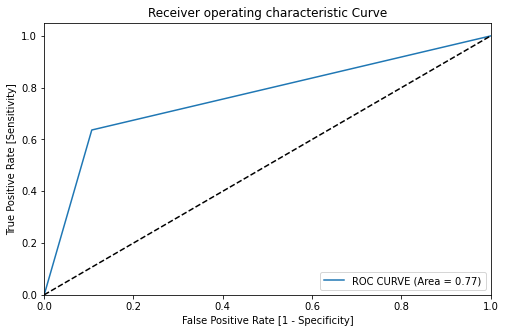

In [60]:
roc_curve(pred_actual.actual, pred_actual.final_prediction)

In [61]:
Precision = metrics.precision_score(pred_actual.actual, pred_actual.final_prediction)
print("Precision:" ,Precision)
Recall = metrics.recall_score(pred_actual.actual, pred_actual.final_prediction)
print("Recall:" , Recall)

Precision: 0.21518733720697256
Recall: 0.6366330764671013


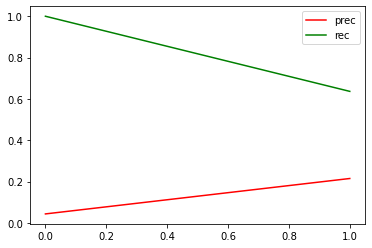

In [62]:
# Plotting the Precision-Recall Trade off Curve.
prec, rec, thresholds = precision_recall_curve(pred_actual.actual, pred_actual.final_prediction)
plt.plot(thresholds, prec[:-1], "r", label = "prec" )
plt.plot(thresholds, rec[:-1], "g", label = "rec")
plt.legend()
plt.show()

In [63]:
# Calculating the F1 score
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.3216531895777178

- Since Logistic regression is giving poor results, lets try Decision Trees. 

## Decision Trees

In [64]:
# Importing the dataset.
df= pd.read_csv('C:\\Users\\shrey\\Downloads\\train_wn75k28.csv')

In [65]:
# Head of our dataset.
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [66]:
# let's look at the statistical aspects of the dataframe.
df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [67]:
# Datatypes of the features in the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [68]:
# Shape of the dataframe.
df.shape

(39161, 19)

In [69]:
# Finding the precentage of null values.
round(100*(lead.isnull().sum()/lead.shape[0]), 2)

id                      0.0
created_at              0.0
campaign_var_1          0.0
campaign_var_2          0.0
signup_date             0.0
user_activity_var_1     0.0
user_activity_var_2     0.0
user_activity_var_3     0.0
user_activity_var_4     0.0
user_activity_var_5     0.0
user_activity_var_6     0.0
user_activity_var_7     0.0
user_activity_var_8     0.0
user_activity_var_9     0.0
user_activity_var_10    0.0
user_activity_var_11    0.0
user_activity_var_12    0.0
buy                     0.0
Year                    0.0
month                   0.0
week                    0.0
day                     0.0
day_of_week             0.0
dtype: float64

In [70]:
# Converting the date columns to Datetime datatype.
df.created_at=pd.to_datetime(df.created_at)
df.signup_date=pd.to_datetime(df.signup_date)

In [71]:
# Converting the date columns to int datatype.
df['created_at']=df['created_at'].map(dt.datetime.toordinal)
df['signup_date']=df['signup_date'].map(dt.datetime.toordinal)

- The date column needs to be in int format to feed it to the algorithm.

In [72]:
# Imputing the missing vales.
df.signup_date.replace(to_replace=np.NaN, value=df.signup_date.mode().values[0], inplace=True)
df.products_purchased.replace(to_replace=np.NaN, value=df.products_purchased.mode().values[0], inplace=True)

In [73]:
# Creating the X and y train datasets.
X_train=df.drop(['id','buy'],axis=1)
y_train=df['buy']

- Decision trees are sensitive to the specific data on which they are trained. If the training data is changed (e.g. a tree is trained on a subset of the training data) the resulting decision tree can be quite different and in turn the predictions can be quite different.

In [74]:
# Building the decision tree model
DT = DecisionTreeClassifier(criterion='gini', max_depth=10)

# Fit the model using train data.
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [75]:
# Predicting the output for train data.
DT_train_pred=DT.predict(X_train)

In [76]:
# Creating a Dataframe with actual and predicted values.
DT_train_output=pd.DataFrame({'id':df.id, 'actual':df.buy, 'predicted':DT_train_pred})

In [77]:
DT_train_output.head()

,id,actual,predicted
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


In [78]:
# Confusion matrix.
DT_conf_m=metrics.confusion_matrix(DT_train_output.actual, DT_train_output.predicted)

In [79]:
# Mapping True positives, True negatives, False Positives and False negatives.
TP2 = DT_conf_m[1,1]
TN2 = DT_conf_m[0,0]
FP2 = DT_conf_m[0,1]
FN2 = DT_conf_m[1,0]

In [80]:
# Calculating parameters for evaluation.
Sensitivity2 = TP2/float(TP2 + FN2)
print("Sensitivity:", Sensitivity2)
Specificity2 = TN2/float(TN2 + FP2)
print("Specificity:", Specificity2)

Sensitivity: 0.5425425425425425
Specificity: 0.9994618303150984


In [81]:
# Calculating parameters for evaluation.
Precision2 = metrics.precision_score(DT_train_output.actual, DT_train_output.predicted)
print("Precision:" ,Precision2)
Recall2 = metrics.recall_score(DT_train_output.actual, DT_train_output.predicted)
print("Recall:" , Recall2)

Precision: 0.9818840579710145
Recall: 0.5425425425425425


In [82]:
# Calculating the F1 score
F1 = 2*(Precision2*Recall2)/(Precision2+Recall2)
F1

0.6989039329464861

- Our Decision tree model is able to predecit fairly well with F1 Score of 0.7.

## Random Forest

In [103]:
# Creating a random forest model.
RF=RandomForestClassifier(n_estimators=400 ,max_depth=20)

# Training the model using the train dataset.
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=400)

- n_estimators= The required number of trees in the Random Forest.
- max_depth = The maximum depth of the tree. 
- Very large numbers of trees may take a long time to prepare, but will not overfit the training data. The final output is based on average or majority ranking and hence there is no problem of overfitting.

In [84]:
# Predicting the output for train data.
RF_train_pred=RF.predict(X_train)

In [85]:
# Converting the numpy array into a pandas series.
RF_train_pred=pd.Series(RF_train_pred)

In [86]:
# Creating a Dataframe with actual and predicted values.
RF_train_output=pd.DataFrame({'id':df.id, 'actual':df.buy, 'predicted':RF_train_pred})

In [87]:
RF_train_output.head()

,id,actual,predicted
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


In [88]:
# Confusion matrix.
RF_conf_m=metrics.confusion_matrix(RF_train_output.actual, RF_train_output.predicted)

In [89]:
# Mapping True positives, True negatives, False Positives and False negatives.
TP3 = RF_conf_m[1,1]
TN3 = RF_conf_m[0,0]
FP3 = RF_conf_m[0,1]
FN3 = RF_conf_m[1,0]

In [90]:
# Calculating parameters for evaluation.
Sensitivity3 = TP3/float(TP3 + FN3)
print("Sensitivity:", Sensitivity3)
Specificity3 = TN3/float(TN3 + FP3)
print("Specificity:", Specificity3)

Sensitivity: 0.6871871871871872
Specificity: 1.0


In [91]:
# Calculating parameters for evaluation.
Precision3 = metrics.precision_score(RF_train_output.actual, RF_train_output.predicted)
print("Precision:" ,Precision3)
Recall3 = metrics.recall_score(RF_train_output.actual, RF_train_output.predicted)
print("Recall:" , Recall3)

Precision: 1.0
Recall: 0.6871871871871872


In [92]:
# Finding F1 Score.
F1_RF = 2*(Precision3*Recall3)/(Precision3+Recall3)
print('F1 Score:',F1_RF)

F1 Score: 0.814595075645209


In [93]:
# Importing the test dataset.
test_df=pd.read_csv('C:\\Users\\shrey\\Downloads\\test_Wf7sxXF.csv')

In [94]:
# Converting the date columns to Datetime datatype.
test_df['created_at']=pd.to_datetime(test_df['created_at'])
test_df['signup_date']=pd.to_datetime(test_df['signup_date'])

In [95]:
# Finding the percentage of null values in test dataset.
(test_df.isnull().sum()/test_df.shape[0])*100

id                       0.000000
created_at               0.000000
campaign_var_1           0.000000
campaign_var_2           0.000000
products_purchased      61.711165
signup_date             50.432342
user_activity_var_1      0.000000
user_activity_var_2      0.000000
user_activity_var_3      0.000000
user_activity_var_4      0.000000
user_activity_var_5      0.000000
user_activity_var_6      0.000000
user_activity_var_7      0.000000
user_activity_var_8      0.000000
user_activity_var_9      0.000000
user_activity_var_10     0.000000
user_activity_var_11     0.000000
user_activity_var_12     0.000000
dtype: float64

In [96]:
# Converting the date columns to int datatype.
test_df['created_at']=test_df['created_at'].map(dt.datetime.toordinal)
test_df['signup_date']=test_df['signup_date'].map(dt.datetime.toordinal)

In [97]:
# Imputing the null values.
test_df.products_purchased.replace(to_replace=np.NaN, value=test_df.products_purchased.mode().values[0], inplace=True)
test_df['signup_date'].replace(to_replace=np.NaN, value= test_df['signup_date'].mode().values[0], inplace=True)

In [98]:
# Creating test data for the model. 
X_test=test_df.drop(['id'],axis=1)

In [104]:
# Prediction for the test data.
RF_test_pred=RF.predict(X_test)

In [105]:
# Converting numpy array to pandas series.
RF_test_pred=pd.Series(RF_test_pred)

In [106]:
# Creating a Dataframe with actual and predicted values.
RF_final_output=pd.DataFrame({'id':test_df.id, 'buy':RF_test_pred})

In [107]:
# Exporting the output file into csv.
RF_final_output.to_csv('Sample_submission.csv', index=False)

### Reasons for RF giving the best results.
- It can also maintain accuracy when a large proportion of data is missing.
- It prevents the overfitting issue which occurred in Decision trees. Random forests are created from subsets of data and the final output is based on average or majority ranking and hence the problem of overfitting is taken care of.
